In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from deepbasic import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

train_x_orig, train_y, test_x_orig, test_y, classes, customimg, customimg_array = load_data()

(1, 64, 64, 3)


y = 0. It's a non-cat picture.


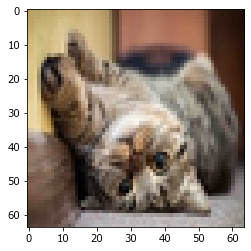

In [2]:

index = 10
plt.imshow(customimg)
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [3]:
print(customimg_array.shape)

(1, 64, 64, 3)


In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
customimg_array_flatten = customimg_array.reshape(customimg_array.shape[0], -1).T 

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
custom_x = customimg_array_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("custom image shape: " + str(custom_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
custom image shape: (12288, 1)


In [5]:
# CONSTANTS
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
print(len(layers_dims))
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL,Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
    
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

5


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.671360
Cost after iteration 200: 0.640804
Cost after iteration 300: 0.629155
Cost after iteration 400: 0.553519
Cost after iteration 500: 0.493365
Cost after iteration 600: 0.426330
Cost after iteration 700: 0.372230
Cost after iteration 800: 0.330570
Cost after iteration 900: 0.291830
Cost after iteration 1000: 0.256508
Cost after iteration 1100: 0.212339
Cost after iteration 1200: 0.253649
Cost after iteration 1300: 0.139343
Cost after iteration 1400: 0.122326
Cost after iteration 1500: 0.105759
Cost after iteration 1600: 0.094773
Cost after iteration 1700: 0.083608
Cost after iteration 1800: 0.075439
Cost after iteration 1900: 0.067618


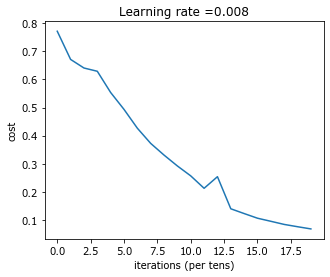

In [20]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.008, num_iterations = 2000, print_cost = True)

In [21]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [22]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8400000000000001


Image: 
Cat probability: 93.0%
This is most likely a cat.


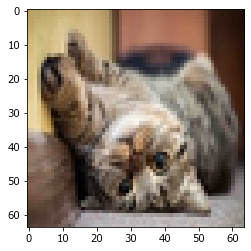

In [27]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)
print("Image: ")
plt.imshow(customimg)
predict_custom_image(custom_x, parameters)


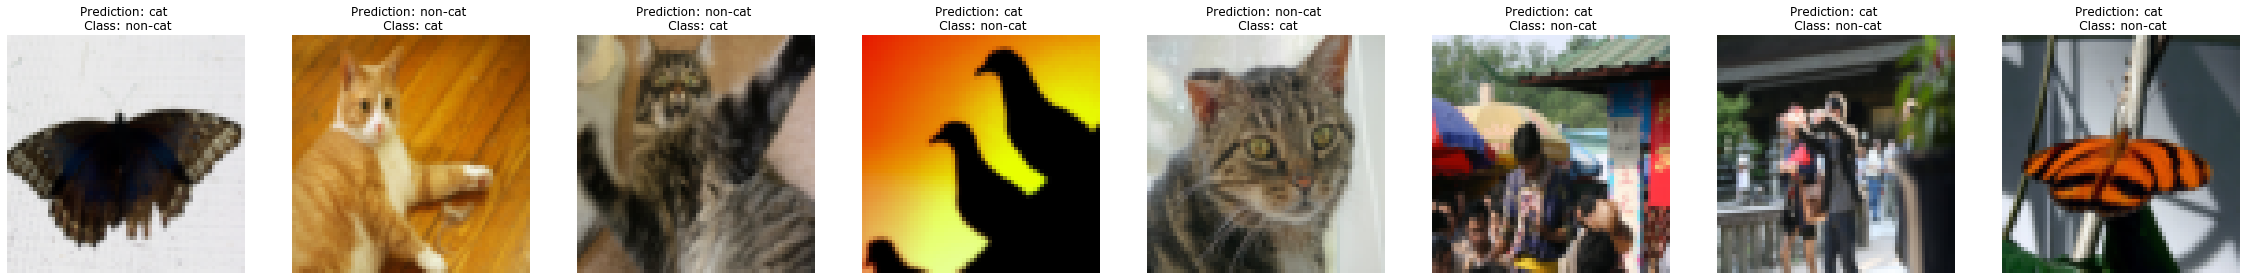

In [10]:
print_mislabeled_images(classes, test_x, test_y, pred_test)